# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import make_classification
dataset = pd.read_csv('linis.csv')



dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})
dataset.fillna(0, inplace=True)

In [30]:
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Survived     891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,1,3,1,22.0,1,0,0
1,2,1,0,38.0,1,0,1
2,3,3,0,26.0,0,0,1
3,4,1,0,35.0,1,0,1
4,5,3,1,35.0,0,0,0
5,6,3,1,0.0,0,0,0
6,7,1,1,54.0,0,0,0
7,8,3,1,2.0,3,1,0
8,9,3,0,27.0,0,2,1
9,10,2,0,14.0,1,0,1


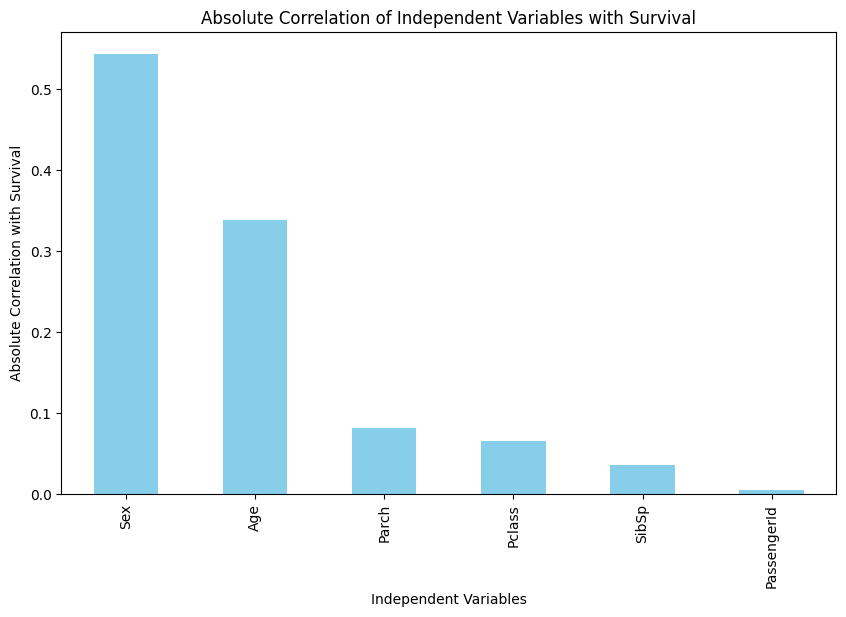

Sex            0.543351
Age            0.338481
Parch          0.081629
Pclass         0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


In [ ]:
dataset = pd.read_csv('linis.csv')
dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset['Pclass'], dataset['Age'] = dataset['Age'], dataset['Pclass']
correlations = dataset.corr()['Survived'].drop('Survived').abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Absolute Correlation of Independent Variables with Survival')
plt.xlabel('Independent Variables')
plt.ylabel('Absolute Correlation with Survival')
plt.show()
print(correlations)

In [32]:
train_data = pd.read_csv("linis.csv") 
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)
print("% of women who survived:", rate_women)


% of women who survived: 0.7420382165605095


In [33]:
train_data = pd.read_csv("linis.csv")
male = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_male = sum(male) / len(male)
print("% of male who survived:", rate_male)


% of male who survived: 0.18890814558058924


# Missing values from the dataset

In [34]:
# Load the dataset
file_path = 'linis.csv'
data = pd.read_csv(file_path)

# Count missing values in each column
missing_values_count = data.isnull().sum()
missing_values_count


PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Survived         0
dtype: int64

### Getting the inputs and output

In [35]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [36]:
X

array([[22.,  1.,  3.,  1.,  0.],
       [38.,  0.,  1.,  1.,  0.],
       [26.,  0.,  3.,  0.,  0.],
       ...,
       [28.,  0.,  3.,  1.,  2.],
       [26.,  1.,  1.,  0.,  0.],
       [32.,  1.,  3.,  0.,  0.]])

In [37]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Creating the Training Set and the Test Set

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=55)

In [39]:
X_train

array([[43.,  1.,  2.,  1.,  1.],
       [32.,  0.,  1.,  0.,  0.],
       [16.,  0.,  3.,  0.,  0.],
       ...,
       [28.,  1.,  1.,  0.,  0.],
       [25.,  1.,  2.,  0.,  0.],
       [34.,  1.,  3.,  0.,  0.]])

In [40]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [41]:
X_test

array([[29.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [30.  ,  0.  ,  2.  ,  3.  ,  0.  ],
       [52.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [16.  ,  1.  ,  3.  ,  4.  ,  1.  ],
       [28.  ,  0.  ,  3.  ,  1.  ,  0.  ],
       [19.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [20.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [28.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [28.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [36.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [38.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [42.  ,  1.  ,  1.  ,  1.  ,  0.  ],
       [33.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [ 6.  ,  0.  ,  3.  ,  4.  ,  2.  ],
       [28.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [28.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [26.  ,  1.  ,  3.  ,  0.  ,  0.  ],
       [38.  ,  0.  ,  3.  ,  1.  ,  5.  ],
       [42.  ,  1.  ,  1.  ,  1.  ,  0.  ],
       [47.  ,  1.  ,  2.  ,  0.  ,  0.  ],
       [19.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [28.  ,  0.  ,  3.  ,  0.  ,  0.  ],
       [ 2.  ,  0.  ,  3.  ,  0.

In [42]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1])

### Feature Scaling

In [43]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [44]:
X_train

array([[ 0.99559587,  0.73561236, -0.3408727 ,  0.50982075,  0.75670808],
       [ 0.16514623, -1.35941164, -1.52478176, -0.47389842, -0.47337446],
       [-1.0427805 , -1.35941164,  0.84303637, -0.47389842, -0.47337446],
       ...,
       [-0.13683545,  0.73561236, -1.52478176, -0.47389842, -0.47337446],
       [-0.36332171,  0.73561236, -0.3408727 , -0.47389842, -0.47337446],
       [ 0.31613708,  0.73561236,  0.84303637, -0.47389842, -0.47337446]])

## Part 2 - Building and training the model

### Building the model

In [45]:
model = LogisticRegression(random_state=55)

### Training the model

In [46]:
model.fit(X_train, y_train)

LogisticRegression(random_state=55)

### Inference

Making the predictions of the data points in the test set

In [47]:
y_pred = model.predict(sc.transform(X_test))

In [48]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1])

Making the prediction of a single data point with:

1. Ticket class = 3
2. Sex('male') = 1
3. Age in years = 22
4. Number of silblings / spouses aboard the titanic = 1
5. Number of parents / children aboard the Titanic = 0

In [49]:
model.predict(sc.transform([[ 1,3,1,22,1,]]))

array([0])

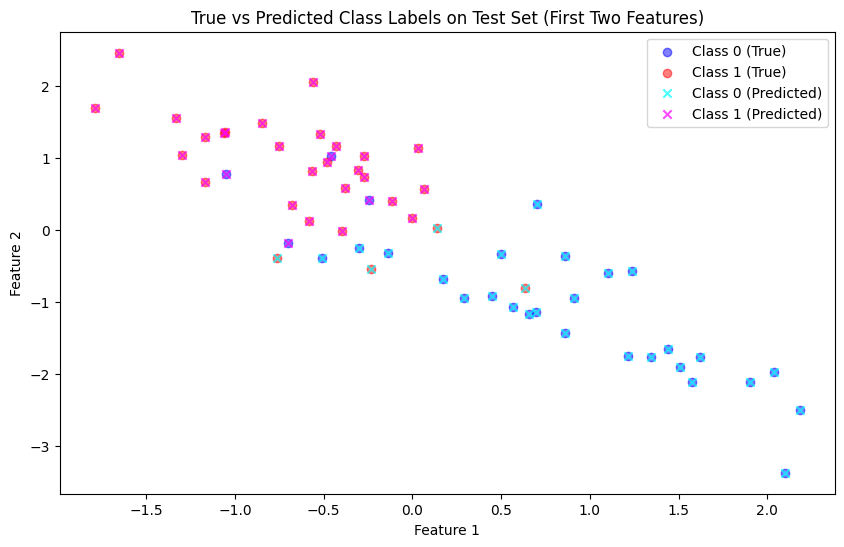

In [50]:
X, y = make_classification(n_samples=200, n_features=5, n_informative=2, n_redundant=3, n_repeated=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color="blue", label="Class 0 (True)", marker="o", alpha=0.5)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color="red", label="Class 1 (True)", marker="o", alpha=0.5)
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color="cyan", label="Class 0 (Predicted)", marker="x", alpha=0.7)
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color="magenta", label="Class 1 (Predicted)", marker="x", alpha=0.7)
plt.title("True vs Predicted Class Labels on Test Set (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()


## Part 3: Evaluating the model 

### Confusion Matrix

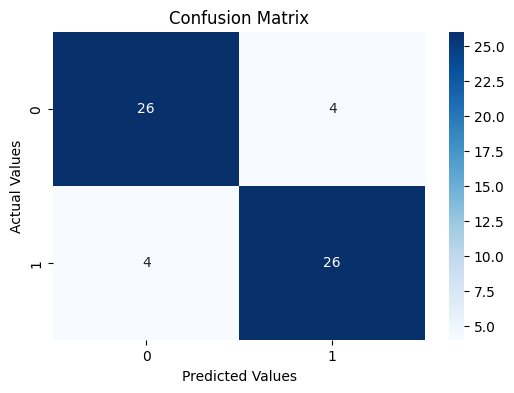

In [51]:
# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  # Corrected 'figrure' to 'figure'
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Accuracy

In [52]:
(26+26)/(26+26+4+4)

0.8666666666666667

In [53]:
accuracy_score(y_test, y_pred)

0.8666666666666667